# 1 - Imports

In [1]:
import pandas as pd
import inflection
import calendar
import datetime
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image

from warnings import filterwarnings

In [131]:
filterwarnings('ignore')

plt.style.use( 'ggplot' )
plt.rcParams['figure.figsize'] = [18, 8]

sns.set

<function seaborn.rcmod.set(*args, **kwargs)>

## 1.1 - Funções

## 1.2 - Carregando os dados

In [3]:
store = pd.read_csv('dados/store.csv', low_memory=False)
train = pd.read_csv('dados/train.csv', low_memory=False)

# Merge
df = pd.merge(store,train, how='left', on='Store')

In [4]:
df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,5,2015-07-31,5263,555,1,1,0,1
1,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,4,2015-07-30,5020,546,1,1,0,1
2,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,3,2015-07-29,4782,523,1,1,0,1
3,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2,2015-07-28,5011,560,1,1,0,1
4,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,1,2015-07-27,6102,612,1,1,0,1


# 2 - Descrição dos dados

In [5]:
df1 = df.copy()

## 2.1 - Renomear as colunas

In [6]:
old_name = ['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'DayOfWeek',
'Date', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday',
'SchoolHoliday']

snakecase = lambda x: inflection.underscore(x)
new_name = list(map(snakecase, old_name))

# Renomear colunas
df1.columns = new_name

In [7]:
print(f'Quantidade de colunas: {df1.shape[0]}')
print(f'Quantidade de linhas: {df1.shape[1]}')

Quantidade de colunas: 1017209
Quantidade de linhas: 18


## 2.2 - Tipo dos dados

In [8]:
df1['date'] = pd.to_datetime(df1['date'])

df1.dtypes

store                                    int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
dtype: object

## 2.3 - Dados nulos

In [9]:
df1.isnull().sum()

store                                0
store_type                           0
assortment                           0
competition_distance              2642
competition_open_since_month    323348
competition_open_since_year     323348
promo2                               0
promo2_since_week               508031
promo2_since_year               508031
promo_interval                  508031
day_of_week                          0
date                                 0
sales                                0
customers                            0
open                                 0
promo                                0
state_holiday                        0
school_holiday                       0
dtype: int64

## 2.4 - Corrigindo os dados nulos

In [10]:
# competition_distance
df1['competition_distance'].fillna(200000, inplace=True)

#competition_open_since_month
df1['competition_open_since_month'].fillna(df1['date'].dt.month, inplace=True)

#competition_open_since_year
df1['competition_open_since_year'].fillna(df1['date'].dt.year, inplace=True)

#promo2_since_week
df1['promo2_since_week'].fillna(df1['date'].dt.week, inplace=True)

#promo2_since_year
df1['promo2_since_year'].fillna(df1['date'].dt.year, inplace=True)

#promo_interval
df1['promo_interval'].fillna(0, inplace=True)

month_map = dict(enumerate(calendar.month_abbr))

df1['month_map'] = df1['date'].dt.month.map(month_map)

df1['is_promo'] = df1[['month_map', 'promo_interval']].apply(lambda x: 0 if x['promo_interval'] == 0 else 1 if 
                                                        x['month_map'] in x['promo_interval'].split( ',' ) else 0, axis=1)

In [11]:
df1.isnull().sum()

store                           0
store_type                      0
assortment                      0
competition_distance            0
competition_open_since_month    0
competition_open_since_year     0
promo2                          0
promo2_since_week               0
promo2_since_year               0
promo_interval                  0
day_of_week                     0
date                            0
sales                           0
customers                       0
open                            0
promo                           0
state_holiday                   0
school_holiday                  0
month_map                       0
is_promo                        0
dtype: int64

## 2.5 - Alterar o tipo dos dados

In [12]:
df1['competition_open_since_month'] = df1['competition_open_since_month'].astype(int)
df1['competition_open_since_year'] = df1['competition_open_since_year'].astype(int)
df1['promo2_since_week'] = df1['promo2_since_week'].astype(int)
df1['promo2_since_year'] = df1['promo2_since_year'].astype(int)

In [13]:
df1.dtypes

store                                    int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month             int64
competition_open_since_year              int64
promo2                                   int64
promo2_since_week                        int64
promo2_since_year                        int64
promo_interval                          object
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
month_map                               object
is_promo                                 int64
dtype: object

## 2.6 -  Análise descritiva

In [14]:
num = df1.select_dtypes(include=['int64', 'float64'])
cat = df1.select_dtypes(exclude=['int64', 'float64', 'datetime64[ns]'])

### 2.6.1 - Análise numérica

In [15]:
# Tendência central(média e mediana) e dispersão (min, max, percentis, std, skew e kurtosis)
desc = num.describe().T
median = pd.DataFrame( num.apply( np.median ) )
range_ = pd.DataFrame( num.apply( lambda x: x.max() - x.min() ) )
skew = pd.DataFrame( num.apply( lambda x: x.skew() ) )
kurtosis = pd.DataFrame( num.apply( lambda x: x.kurtosis() ) )

desc.insert(2,'median', median[0].values)
desc.insert(len(desc.columns),'range', range_[0].values)
std = desc.pop('std')
desc.insert(len(desc.columns),'std', std)
desc.insert(len(desc.columns),'skew', skew[0].values)
desc.insert(len(desc.columns),'kurtosis', kurtosis[0].values)

desc

,count,mean,median,min,25%,50%,75%,max,range,std,skew,kurtosis
store,1017209.0,558.429727,558.0,1.0,280.0,558.0,838.0,1115.0,1114.0,321.908651,-0.000955,-1.200524
competition_distance,1017209.0,5935.442677,2330.0,20.0,710.0,2330.0,6910.0,200000.0,199980.0,12547.652996,10.242344,147.789712
competition_open_since_month,1017209.0,6.786849,7.0,1.0,4.0,7.0,10.0,12.0,11.0,3.311087,-0.042076,-1.232607
competition_open_since_year,1017209.0,2010.324840,2012.0,1900.0,2008.0,2012.0,2014.0,2015.0,115.0,5.515593,-7.235657,124.071304
promo2,1017209.0,0.500564,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.500000,-0.002255,-1.999999
promo2_since_week,1017209.0,23.619033,22.0,1.0,12.0,22.0,37.0,52.0,51.0,14.310064,0.178723,-1.184046
promo2_since_year,1017209.0,2012.793297,2013.0,2009.0,2012.0,2013.0,2014.0,2015.0,6.0,1.662658,-0.784436,-0.210075
day_of_week,1017209.0,3.998341,4.0,1.0,2.0,4.0,6.0,7.0,6.0,1.997391,0.001593,-1.246873
sales,1017209.0,5773.818972,5744.0,0.0,3727.0,5744.0,7856.0,41551.0,41551.0,3849.926175,0.641460,1.778375
customers,1017209.0,633.145946,609.0,0.0,405.0,609.0,837.0,7388.0,7388.0,464.411734,1.598650,7.091773


### 2.6.2 - Análise categórica

In [16]:
cat.apply(lambda x: x.unique().shape[0])

store_type         4
assortment         3
promo_interval     4
state_holiday      4
month_map         12
dtype: int64

<AxesSubplot:xlabel='assortment', ylabel='sales'>

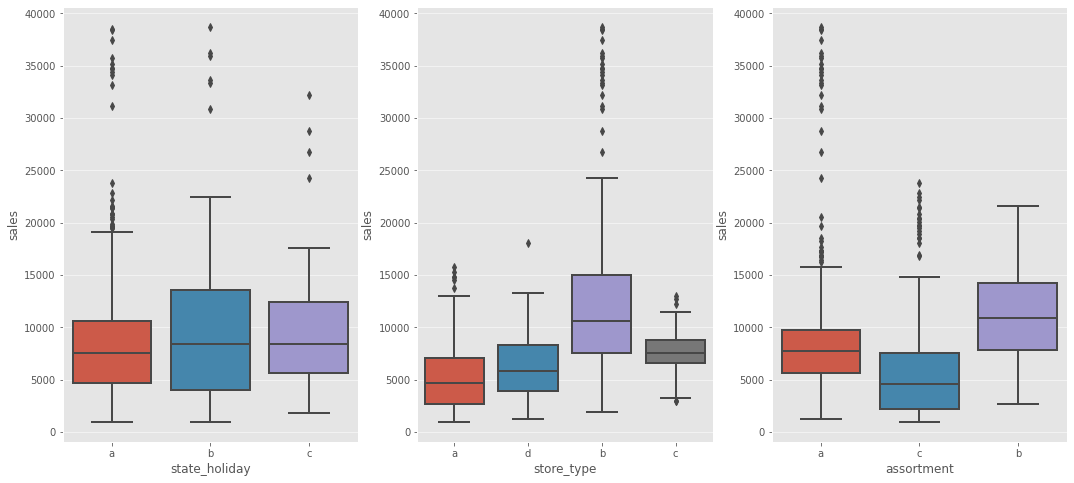

In [57]:
aux = df1[(df1['state_holiday'] != '0') & (df1['sales'] > 0)]


plt.subplot(1, 3, 1)
sns.boxplot(x='state_holiday', y='sales', data=aux)
plt.subplot(1, 3, 2)
sns.boxplot(x='store_type', y='sales', data=aux)
plt.subplot(1, 3, 3)
sns.boxplot(x='assortment', y='sales', data=aux)

# 3 - Feature Engineering

## 3.1 - Mapa mental das hipóteses

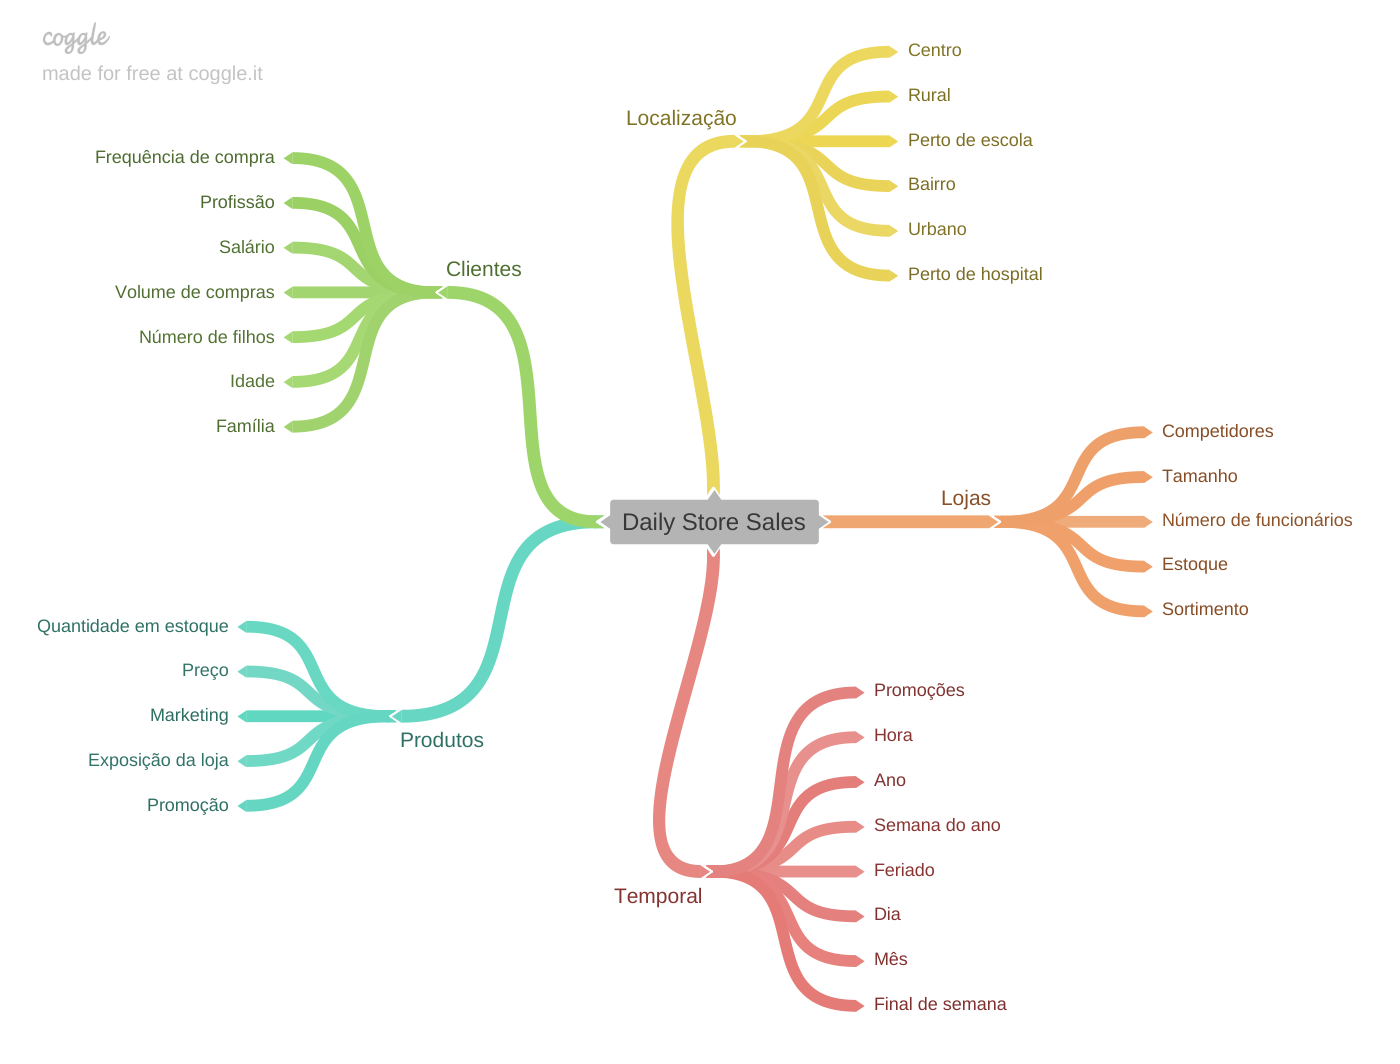

In [18]:
Image('img/hipoteses_mindmap.png', width=650, height=1150)

## 3.2 - Criação das hipóteses

### 3.2.1 - Hipótese da loja

**1.** Loja com maior número de funcionários deveriam vender mais.  

**2.** Lojas com maior capacidade de estoque deveriam vender mais.   

**3.** Lojas com maior porte deveriam vender mais.  

**4.** Lojas com maior sortimentos deveriam vender mais.  

**5.** Lojas com competidores mais próximos deveriam vender menos.  

**6.** Lojas com competidores à mais tempo deveriam vendem mais.  

### 3.2.2 - Hipótese do produto

**1.** Lojas que investem mais em Marketing deveriam vender mais.

**2.** Lojas com maior exposição de produto deveriam vender mais.

**3.** Lojas com produtos com preço menor deveriam vender mais.

**4.** Lojas com promoções mais agressivas ( descontos maiores ), deveriam vender mais.

**5.** Lojas com promoções ativas por mais tempo deveriam vender mais.

**6.** Lojas com mais dias de promoção deveriam vender mais.

**7.** Lojas com mais promoções consecutivas deveriam vender mais.

### 3.2.3 - Hipótese do tempo

**1.** Lojas abertas durante o feriado de Natal deveriam vender mais.

**2.** Lojas deveriam vender mais ao longo dos anos.

**3.** Lojas deveriam vender mais no segundo semestre do ano.

**4.** Lojas deveriam vender mais depois do dia 10 de cada mês.

**5.** Lojas deveriam vender menos aos finais de semana.

**6.** Lojas deveriam vender menos durante os feriados escolares.

## 3.3 - Lista final de hipóteses

**1.** Lojas com maior sortimentos deveriam vender mais.

**2.** Lojas com competidores mais próximos deveriam vender menos.

**3.** Lojas com competidores à mais tempo deveriam vendem mais.

**4.** Lojas com promoções ativas por mais tempo deveriam vender mais.

**5.** Lojas com mais dias de promoção deveriam vender mais.

**6.** Lojas com mais promoções consecutivas deveriam vender mais.

**7.** Lojas abertas durante o feriado de Natal deveriam vender mais.

**8.** Lojas deveriam vender mais ao longo dos anos.

**9.** Lojas deveriam vender mais no segundo semestre do ano.

**10.** Lojas deveriam vender mais depois do dia 10 de cada mês.

**11.** Lojas deveriam vender menos aos finais de semana.

**12.** Lojas deveriam vender menos durante os feriados escolares.

In [19]:
df2 = df1.copy()

### 3.4 - Feature engineering

In [20]:
# year
df2['year'] = df2['date'].dt.year

# month
df2['month'] = df2['date'].dt.month

# day
df2['day'] = df2['date'].dt.day

# week of year
df2['week_of_year'] = df2['date'].dt.weekofyear

#year week
df2['year_week'] = df2['date'].dt.strftime('%Y-%W')

# competition since
df2['competition_since'] = df2.apply(lambda x: datetime.datetime(year=x['competition_open_since_year'], 
                                                                 month=x['competition_open_since_month'], day=1), axis=1)
df2['competition_time_month'] = ((df2['date'] - df2['competition_since'])/30).apply(lambda x: x.days).astype(int)

#promo since
df2['promo_since'] = df2['promo2_since_year'].astype(str) + '-' + df2['promo2_since_week'].astype(str)
df2['promo_since'] = df2['promo_since'].apply(lambda x: datetime.datetime.strptime(x + '-1', '%Y-%W-%w') - 
                                                                                      datetime.timedelta(days=7))
df2['promo_time_week'] = ((df2['date'] - df2['promo_since'])/7).apply(lambda x: x.days).astype(int)

#assortment
df2['assortment'] = df2['assortment'].apply(lambda x: 'basic' if x == 'a' else 'extra' if x == 'b' else 'extended')

#state holiday
df2['state_holiday'] = df2['state_holiday'].apply(lambda x: 'public_holiday' if x == 'a' else 'easter_holiday' if x == 'b'
                                                 else 'christmas' if x == 'c' else 'regular_day')

# 4 - Filtragem das variáveis

In [21]:
df3 = df2.copy()

## 4.1 - Filtragem das linhas

In [22]:
df3 = df3[(df3['open'] != 0) & (df3['sales'] > 0)]

## 4.2 - Seleção das colunas

In [23]:
df3.drop(['customers', 'open', 'promo_interval', 'month_map'], axis=1, inplace=True)

# 5 - Análise exploratória dos dados

In [24]:
df4 = df3.copy()

## 5.1 - Análise univariada

### 5.1.1 - Variável resposta

<AxesSubplot:xlabel='sales', ylabel='Density'>

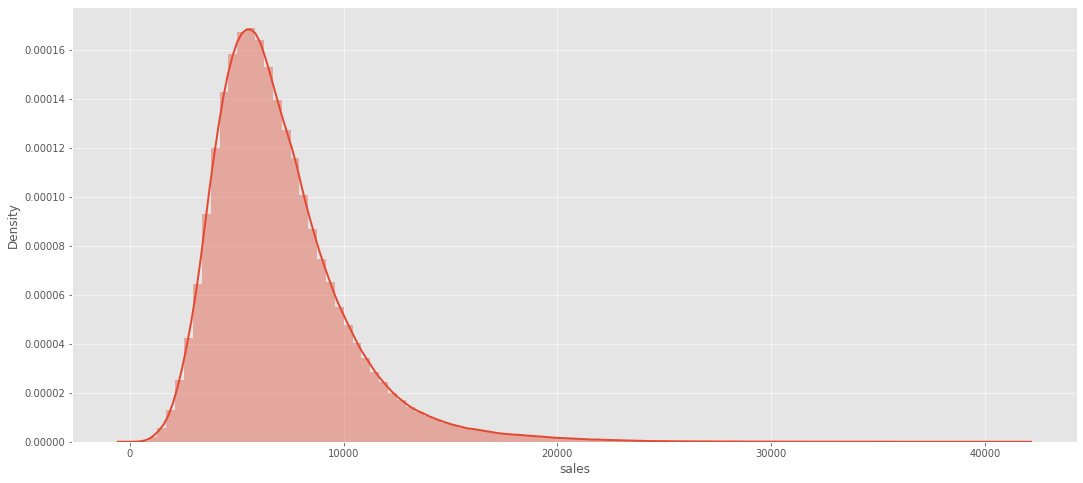

In [61]:
sns.distplot(df4['sales'], bins=100, kde=True)

### 5.1.2 - Variáveis numéricas

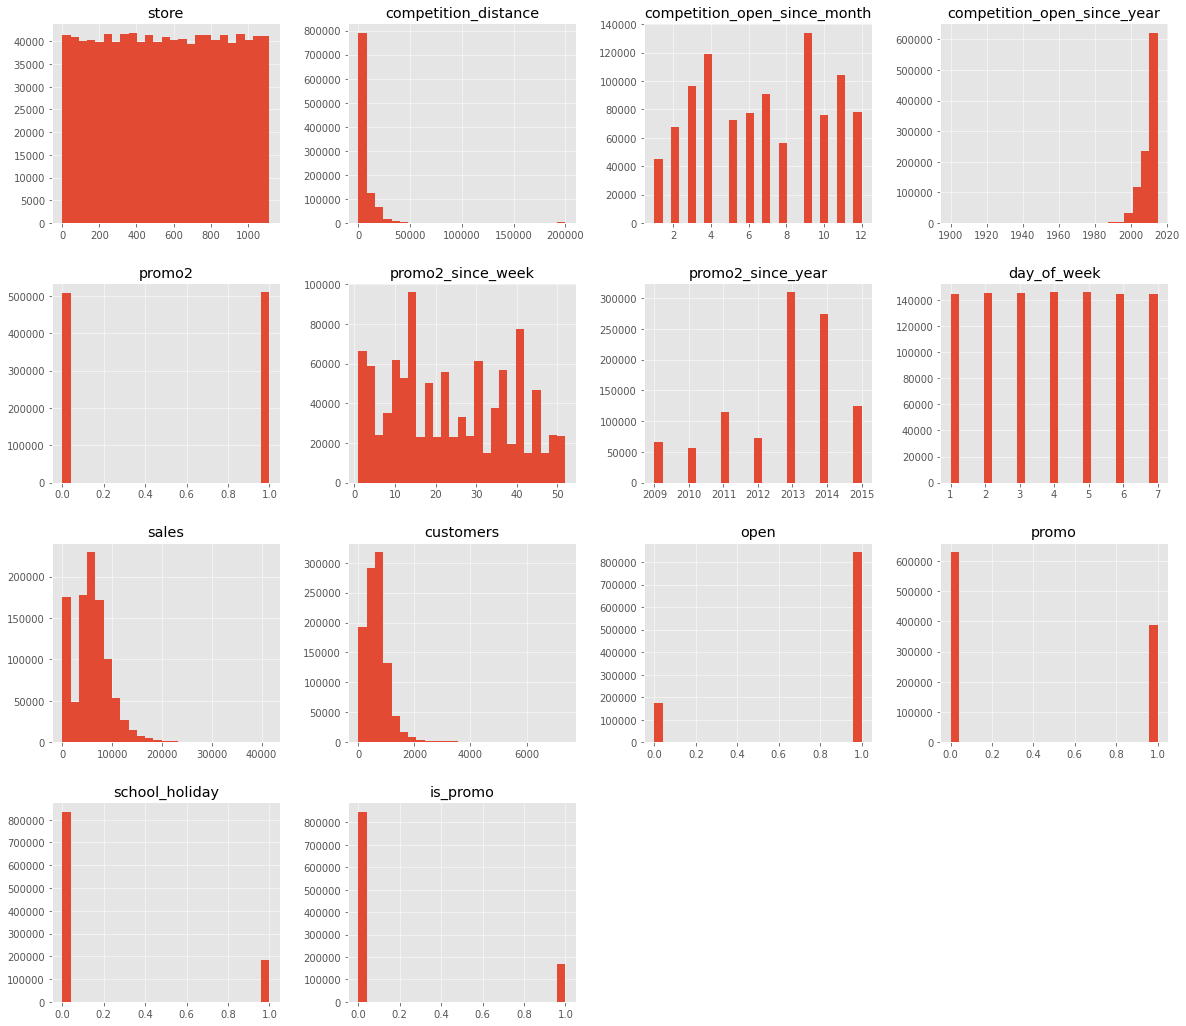

In [76]:
num.hist(figsize=(20,18), bins=25);

### 5.1.3 - Variáveis categóricas

In [148]:
df4['assortment'].value_counts()

basic       444875
extended    391254
extra         8209
Name: assortment, dtype: int64

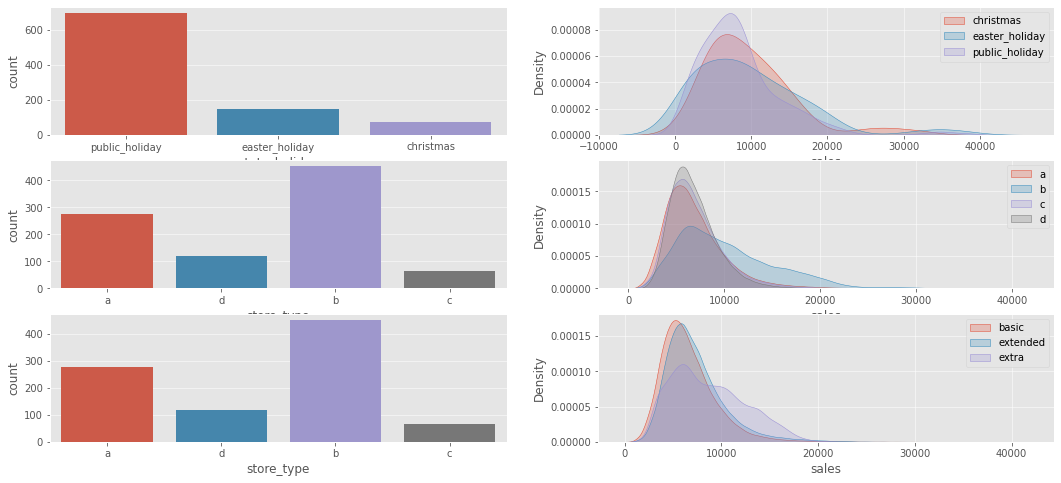

In [153]:
aux = df4[df4['state_holiday'] != 'regular_day']

plt.subplot(3, 2, 1)
sns.countplot(aux['state_holiday'])

plt.subplot(3, 2, 2)
sns.kdeplot(df4[df4['state_holiday'] == 'christmas']['sales'], label='christmas', shade=True)
sns.kdeplot(df4[df4['state_holiday'] == 'easter_holiday']['sales'], label='easter_holiday', shade=True)
sns.kdeplot(df4[df4['state_holiday'] == 'public_holiday']['sales'], label='public_holiday', shade=True)
plt.ticklabel_format(style='plain', axis='y')
plt.legend()

plt.subplot(3, 2, 3)
sns.countplot(aux['store_type'])

plt.subplot(3, 2, 4)
df4.sort_values('store_type')
sns.kdeplot(df4[df4['store_type'] == 'a']['sales'], label='a', shade=True)
sns.kdeplot(df4[df4['store_type'] == 'b']['sales'], label='b', shade=True)
sns.kdeplot(df4[df4['store_type'] == 'c']['sales'], label='c', shade=True)
sns.kdeplot(df4[df4['store_type'] == 'd']['sales'], label='d', shade=True)
plt.ticklabel_format(style='plain', axis='y')
plt.legend()

plt.subplot(3, 2, 5)
sns.countplot(aux['store_type'])

plt.subplot(3, 2, 6)
df4.sort_values('assortment')
sns.kdeplot(df4[df4['assortment'] == 'basic']['sales'], label='basic', shade=True)
sns.kdeplot(df4[df4['assortment'] == 'extended']['sales'], label='extended', shade=True)
sns.kdeplot(df4[df4['assortment'] == 'extra']['sales'], label='extra', shade=True)

plt.ticklabel_format(style='plain', axis='y')
plt.legend();

## 5.2 - Análise bivariada

## 5.1 - Análise multivariada